In [ ]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [ ]:
physicaldevices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physicaldevices[0],True)
except:
    pass

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url,output,quiet = False)
gdown.extractall('data.zip')

Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:03<00:00, 107MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path:str) ->List[float]:
  cap = cv2.VideoCapture(path)
  frames = []
  for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame = cap.read()
    frame = tf.image.rgb_to_grayscale(frame)
    frames.append(frame[190:236,80:220,:])
  cap.release()

  mean = tf.math.reduce_mean(frames)
  std = tf.math.reduce_std(tf.cast(frames,tf.float32))
  return tf.cast((frames - mean), tf.float32)/std

In [ ]:
vocab = [i for i in  "1234567890qwertyuiopasdfghjklzxcvbnm'?! "]

In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary = vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(),oov_token="",invert = True)

print(f"vocabulary is :{char_to_num.get_vocabulary()}"  f"(size ={char_to_num.vocabulary_size()})")

vocabulary is :['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm', "'", '?', '!', ' '](size =41)


In [ ]:
def load_alignments(path:str) -> List[str]:
  with open(path,'r') as f:
    lines = f.readlines()
  tokens = []
  # print(lines)
  for l in lines:
    l = l.split()
    if l[2] != 'sil':
      tokens= [*tokens,' ',l[2]]
  return char_to_num(tf.reshape(tf.strings.unicode_split(tokens,input_encoding = 'UTF-8'),(-1)))[1:]

In [ ]:
def load_data(path:str):
  path = bytes.decode(path.numpy())
  file_name = path.split('/')[-1].split('.')[0]
  video_path = os.path.join('data','s1',f'{file_name}.mpg')
  alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
  frames = load_video(video_path)
  alignments = load_alignments(alignment_path)

  return frames, alignments

In [ ]:
testing_path = './data/s1/bbal6n.mpg'

In [ ]:
frames , alignments = load_data(tf.convert_to_tensor(testing_path))
print(frames)
print(alignments)

tf.Tensor(
[[[[ 1.460374  ]
   [ 1.460374  ]
   [ 1.4209044 ]
   ...
   [ 0.15787826]
   [ 0.19734783]
   [ 0.07893913]]

  [[ 1.460374  ]
   [ 1.460374  ]
   [ 1.4209044 ]
   ...
   [ 0.15787826]
   [ 0.07893913]
   [ 0.03946957]]

  [[ 1.4209044 ]
   [ 1.4209044 ]
   [ 1.3814349 ]
   ...
   [ 0.07893913]
   [ 0.07893913]
   [ 0.07893913]]

  ...

  [[ 0.9472696 ]
   [ 0.9472696 ]
   [ 0.9472696 ]
   ...
   [ 9.946331  ]
   [ 9.867392  ]
   [ 9.867392  ]]

  [[ 0.9472696 ]
   [ 0.9472696 ]
   [ 0.9472696 ]
   ...
   [ 9.906861  ]
   [ 9.867392  ]
   [ 9.867392  ]]

  [[ 0.9472696 ]
   [ 0.9472696 ]
   [ 0.9472696 ]
   ...
   [ 9.906861  ]
   [ 9.867392  ]
   [ 9.867392  ]]]


 [[[ 1.4209044 ]
   [ 1.4209044 ]
   [ 1.3419653 ]
   ...
   [ 0.19734783]
   [ 0.1184087 ]
   [ 0.15787826]]

  [[ 1.4209044 ]
   [ 1.4209044 ]
   [ 1.3419653 ]
   ...
   [ 0.2368174 ]
   [ 0.        ]
   [ 0.03946957]]

  [[ 1.3419653 ]
   [ 1.3419653 ]
   [ 1.3024957 ]
   ...
   [ 0.1184087 ]
   [ 0.15787826]


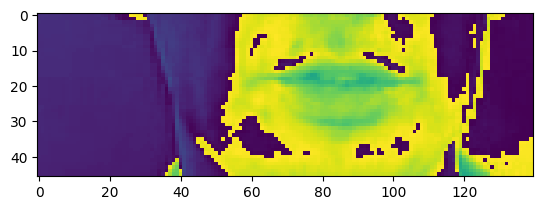

In [ ]:
plt.imshow(frames[32])

In [ ]:
num_to_char(alignments.numpy())

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'l', b' ', b's', b'i', b'x', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [ ]:
from typing import Tuple
def mappable_function(path:str) ->Tuple[tf.Tensor, tf.Tensor]:
      result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
      return result

In [ ]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
train = data.take(450)
test = data.skip(450)

In [ ]:
sample = data.as_numpy_iterator()

In [ ]:
val = sample.next(); val[0]

array([[[[[1.4715478 ],
          [1.4715478 ],
          [1.399765  ],
          ...,
          [0.3948055 ],
          [0.3230227 ],
          [0.3230227 ]],

         [[1.5433307 ],
          [1.5074393 ],
          [1.399765  ],
          ...,
          [0.3948055 ],
          [0.3230227 ],
          [0.3230227 ]],

         [[1.5074393 ],
          [1.5074393 ],
          [1.4356564 ],
          ...,
          [0.3589141 ],
          [0.28713128],
          [0.28713128]],

         ...,

         [[0.96906805],
          [0.96906805],
          [0.96906805],
          ...,
          [0.07178282],
          [0.07178282],
          [0.07178282]],

         [[0.96906805],
          [0.96906805],
          [0.96906805],
          ...,
          [0.10767423],
          [0.07178282],
          [0.07178282]],

         [[0.96906805],
          [0.96906805],
          [0.96906805],
          ...,
          [0.10767423],
          [0.07178282],
          [0.03589141]]],


        [[[1.4356

In [ ]:
fv = (val[0][1].astype(np.uint8) * 255).squeeze()
imageio.mimsave('./animation.gif', fv,duration=100)

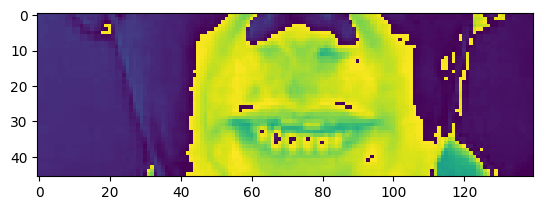

In [ ]:
plt.imshow(val[0][0][35])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin green by h four now'>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
data.as_numpy_iterator().next()[0].shape

(2, 75, 46, 140, 1)

In [ ]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [ ]:
p1 = model.predict(val[0])

1/1 [==============================] - 7s 7s/step


In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(p1[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'                                                                          s'>

In [ ]:
model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 42)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [ ]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)


In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

In [ ]:
example_callback = ProduceExample(test)


In [ ]:
model.fit(train, validation_data=test, epochs=1, callbacks=[checkpoint_callback, schedule_callback, example_callback])

1/1 [==============================] - 2s 2s/step
Original: set red with i four please
Prediction: le e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green by m five again
Prediction: le e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 883s 2s/step - loss: 84.4318 - val_loss: 69.2009 - lr: 1.0000e-04


In [ ]:
model.load_weights('models/checkpoint')

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
sample = test_data.next(); sample[0]

array([[[[[1.4414349 ],
          [1.4783947 ],
          [1.5523145 ],
          ...,
          [0.22175921],
          [0.22175921],
          [0.22175921]],

         [[1.4414349 ],
          [1.4783947 ],
          [1.5892743 ],
          ...,
          [0.22175921],
          [0.22175921],
          [0.22175921]],

         [[1.4783947 ],
          [1.4783947 ],
          [1.4783947 ],
          ...,
          [0.3695987 ],
          [0.29567894],
          [0.29567894]],

         ...,

         [[0.99791646],
          [0.99791646],
          [0.9609566 ],
          ...,
          [0.07391974],
          [0.07391974],
          [0.07391974]],

         [[0.99791646],
          [0.99791646],
          [0.9609566 ],
          ...,
          [0.03695987],
          [0.03695987],
          [0.03695987]],

         [[0.99791646],
          [0.99791646],
          [0.9609566 ],
          ...,
          [0.03695987],
          [0.03695987],
          [0.03695987]]],


        [[[1.4783

In [ ]:
yhat = model.predict(sample[0])

1/1 [==============================] - 0s 265ms/step


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set white with c five soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin red with t seven again'>]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'le '>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'la '>]

In [ ]:
sample = load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))

In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [ ]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 1s/step


In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'le '>]